## Tee beam Girder Design USing python


In [1]:
#Tee beam Girder Design USing python
print("Deck Slab Design")
print('-'*44)
#importing all libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#Asssum..........................................................
thickness_of_slab =80 #in mm
#permissible Stresses
st=200#N/mm2
Q=1.1#
j=0.9

Deck Slab Design
--------------------------------------------


In [2]:
##### Take inpute or GET User Inputes
while True:
    try:
        cg=int(input("Grade of concrete"))
        sg=int(input("Grade of steel "))
        crg=float(input("carriageway in m"))
        sp=int(input("Span of the bridge m"))
        no_girders=int(input("No of girders "))
        bearing=int(input("width of bearing mm "))
        Awc=int(input("Average thickness of the wearing coat mm "))
       
    except:
        print("Data Input Error ! Try Again.")
    else:
        break

Grade of concrete 25
Grade of steel  415
carriageway in m 3
Span of the bridge m 3
No of girders  3
width of bearing mm  20
Average thickness of the wearing coat mm  20


In [17]:
#calculating Depth of Slab and Effective depth of slab
def depth_of_slab(thickness_of_slab,sp):
    global Ed
    global overall_depth
    overall_depth=thickness_of_slab*sp
    print("overall depth of slab",overall_depth,"mm")
    bc=20/2+30#bar centr and clear cover 
    Ed=overall_depth-bc
    
    print("Effective depth of the slab",Ed,"mm")
          
depth_of_slab(thickness_of_slab,sp)


overall depth of slab 240 mm
Effective depth of the slab 200.0 mm


In [18]:
#calculate effective span
def effective_span(Ed,bearing,sp):
    global Es,l
    Es=sp+(Ed/1000)#
    l=sp+(bearing/1000)
    print("Effective span is",l,"m")##effective span

effective_span(Ed,bearing,sp)

Effective span is 3.02 m


In [5]:
#calculate dead load bending movement and shear force

def dead_load(overall_depth,Awc):
    global W
    dead_load_slab=(overall_depth/1000)*24
    print("dead_load_slab",dead_load_slab,"kN/m2")
    dead_load_wc=(Awc/1000)*22
    print("dead load wearing coat",dead_load_wc,"kN/m2")
    import math
    W=dead_load_slab+dead_load_wc
    print("Total Dead Load",math.ceil(W),"kN/m2")
    
dead_load(overall_depth,Awc)


dead_load_slab 5.76 kN/m2
dead load wearing coat 0.44 kN/m2
Total Dead Load 7 kN/m2


In [6]:
#calculate Dead load bending movement and dead load shear force
import math
def dead_bending_movement(l,W):
    global DLL
    DLL=((1**2)*W)/8
    print("dead load bending movement",math.ceil(DLL),"kN/m2")
    #dead Load shear force
    dsf=(W*l)/2
    print("dead load shear force",math.ceil(dsf),"kN/m2")
    
dead_bending_movement(l,W)

dead load bending movement 1 kN/m2
dead load shear force 10 kN/m2


In [7]:
#calculate live load bending def 
def width_deckslab(crg):
    global B
    B=crg+(2*1)
    print("width of deck slab",B)
width_deckslab(crg)
#find k=B/k
k1=round(B/l,1)
if k1==0.1:
    alpha=0.40
elif k1==0.2:
    alpha=0.80
elif k1==0.3:
    alpha=1.16
elif k1==0.4:
    alpha=1.48
elif k1==0.5:
    alpha=1.72
elif k1==0.6:
    alpha=1.96
elif k1==0.7:
    alpha=2.12
elif k1==0.8:
    alpha=2.24
elif k1==0.9:
    alpha=2.36
elif k1==1.0:
    alpha=2.48
elif k1==1.0:
    alpha=2.60
elif k1==1.1:
    alpha=2.64
elif k1==1.2:
    alpha=2.68
elif k1==1.3:
    alpha=2.72
elif k1==1.4:
    alpha=2.80
elif k1==1.5:
    alpha=2.84
elif k1==1.6:
    alpha=2.88
elif k1==1.7:
    alpha=2.92
elif k1==1.8:
    alpha=2.96
elif k1==1.9:
    alpha=3
else:
    alpha=3#above all 3
print(alpha)

width of deck slab 5.0
2.92


In [8]:
#conc IRC AA loading for tracked vahicles
width_of_tract=0.85#meter
Space_bt_two_tracs=1.2#meter
total_load_of_tracked=700#kN/
area_of_vehicles=3.6#m
total_len_of_vec=7.2#m
x=l/2#center of gravity distance
b1=width_of_tract+(2* (Awc/1000))


#calculating effective width of disperssion
def eff_width_diss(alpha,x,l,b1):
    global two_vec
    bef=b1+(alpha*x)*(1-(x/l))
    print("effective width of dispersion for single vehicle",round(bef,2),"m")
    two_vec=2.625+2.05+(bef/2)
    print("effective width of dispersion for double vehicle",round(two_vec,2),"m"  )
eff_width_diss(alpha,x,l,b1 )  
#calculate Effective Length of Dispersion
#-----------------------------------------------------------------------------------------
def eff_len(area_of_vehicles,Awc,overall_depth):
    global eff_lennt
    eff_lennt=area_of_vehicles+2*((overall_depth/1000)+(Awc/1000))
    print("effective length of dispersion ",eff_lennt,"m")
eff_len(area_of_vehicles,Awc,overall_depth)
 #--------------------------------------------------------
#wheel load will have disper area
disper_area=eff_lennt*two_vec
print("wheel load will have disper area =====",  disper_area,"m")  

effective width of dispersion for single vehicle 3.09 m
effective width of dispersion for double vehicle 6.22 m
effective length of dispersion  4.12 m
wheel load will have disper area ===== 25.635876 m


In [9]:
#impact factor calculations(Accding to IRC AA class loading is 25% for spans upto 5m and linearly reduce ti 10% for spans 9m
IF=25-((25-10)/(9-5))*(6.5-5)
print("Impact Factor is ==",IF,"%")
IF1=(IF/100)+1
IF
############################################################################################################################
#Intensity of loading
IL=(IF1*total_load_of_tracked)/(4.68*7.38)
print("Intensity of live Loading",IL,"kn/m2")
##################################################################3
RA=RB=(IL*eff_lennt)/2
print("RA==",RA,"kN")
#MAx live load bending movement
MLL=(RA*(l/2))-(IL*(eff_lennt/2)*(eff_lennt/4))
print("maximum Live Load Bending Movement",math.ceil(MLL),"kNm")
#Design Of bending movement
Mu=DLL+MLL
print("Design Bending Movement (Mu)",math.ceil(Mu),"kN/m")
#calculate mu=Q*b*d ,effective depth required (d)
d=math.sqrt(Mu*(10**6)/(Q*1000))
print("effective depth required",math.ceil(d),"mm")

Impact Factor is == 19.375 %
Intensity of live Loading 24.194085423760228 kn/m2
RA== 49.83981597294607 kN
maximum Live Load Bending Movement 24 kNm
Design Bending Movement (Mu) 25 kN/m
effective depth required 150 mm


In [10]:
#calculate Area of Tension Reinforcement
Ast=Mu*(10**6)/(st*j*d)
print("Area of Tension Reinforcement",Ast,"mm2")
#spacing of 20mm bar
Area_of_one_bar=314#
spacing=(1000*Area_of_one_bar)/Ast
print("Spacing of bar",math.ceil(spacing),"mm")

Area of Tension Reinforcement 915.7052674540383 mm2
Spacing of bar 343 mm


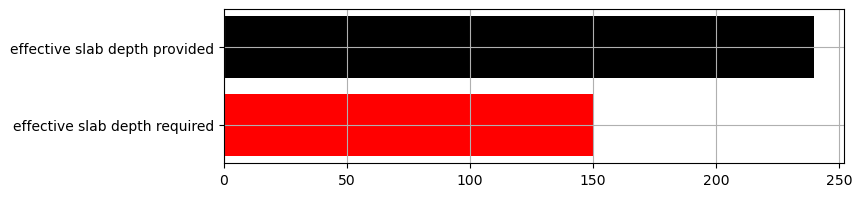

In [82]:
#live load bending movement and shear forces
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 2))
x=([d,overall_depth])
y=(["effective slab depth required","effective slab depth provided"])
c=['red','black']

plt.barh(y,x,height=0.8,color=c)
plt.grid()


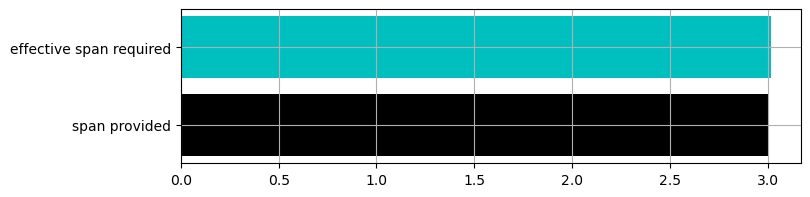

In [79]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 2))
x=([sp,l])
y=(["span provided","effective span required"])
c=['black','c']
plt.barh(y,x,height=0.8,color=c)
plt.grid()


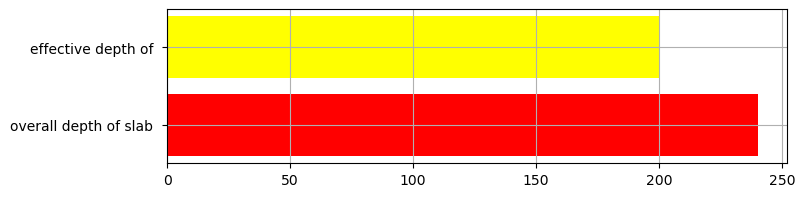

In [73]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 2))
x=([overall_depth,Ed])
c = ['red', 'yellow']
y=(["overall depth of slab ","effective depth of "])
plt.barh(y,x,height=0.8,color=c)
plt.grid()

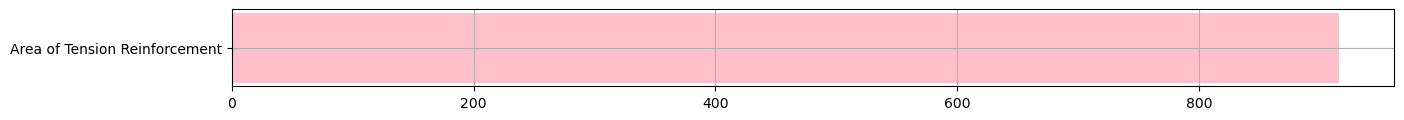

In [48]:
import matplotlib.pyplot as plt
import numpy as np
x=([Ast])
y=(["Area of Tension Reinforcement"])
plt.rcParams['figure.figsize'] = (15, 1)
c = ['red', 'yellow']
plt.figure
plt.barh(y,x,height=0.5,color = 'pink')
plt.grid()

### Girder Design

In [66]:

def cal(sp,no_girders,DLL,MLL):
    # Input variables
    global M_inner_uls,M_outer_uls,LM_outer_uls,M_inner_uls,V_inner_design,M_outer_design,M,M_inner_design
    L = 20        # span length (m)
    n = no_girders         # number of girders
    w_dl = 25     # dead load per unit length (kN/m)
    w_ll =  MLL/100    # live load per unit length (kN/m)
    eff_width = 8  # effective width of bridge (m)
    gamma_f = 1.35  # partial safety factor for loads
    gamma_m = 1.1   # partial safety factor for materials
    fy = 250       # yield strength of steel (MPa)

    # Calculate total load on bridge
    total_load = w_dl * eff_width + w_ll * eff_width

    # Calculate coefficients for outer and inner girders
    a_outer = (n - 1) / (2 * n)
    a_inner = 1 / n
    b_outer = eff_width / (2 * L) * ((n - 1) / n)
    b_inner = eff_width / (2 * L)

    # Calculate reactions for outer and inner girders
    R_outer = total_load * ((a_outer + b_outer) / (a_outer * b_inner - a_inner * b_outer))
    R_inner = total_load - R_outer

    # Calculate maximum BM and SF due to dead load
    M_dl_max = w_dl * eff_width / 8 * L
    V_dl_max = w_dl * eff_width / 2

    # Calculate maximum BM and SF due to live load
    M_ll_max = w_ll * eff_width / 8 * L
    V_ll_max = w_ll * eff_width / 2

    # Calculate BM and SF for outer and inner girders due to dead load
    M_outer_dl = R_outer * (L / 2) - M_dl_max / 2
    M_inner_dl = R_inner * (L / 2) - M_dl_max / 2
    V_outer_dl = V_dl_max - R_outer
    V_inner_dl = V_dl_max - R_inner

    # Calculate BM and SF for outer and inner girders due to live load
    M_outer_ll = R_outer * (L / 2) - M_ll_max / 2
    M_inner_ll = R_inner * (L / 2) - M_ll_max / 2
    V_outer_ll = V_ll_max - R_outer
    V_inner_ll = V_ll_max - R_inner

    # Calculate design ultimate load BM for outer girder
    M_outer_uls = gamma_f * (1.2 * w_dl * eff_width / 8 + 1.5 * w_ll * eff_width / 8) * L**2 / 8 / gamma_m

    # Calculate total design SF for outer and inner girders
    V_outer_design = V_outer_dl + gamma_f * 1.5 * w_ll * eff_width / gamma_m
    V_inner_design = V_inner_dl + gamma_f * 1.5 * w_ll * eff_width / gamma_m

    # Calculate required section modulus for outer and inner girders
    Z_outer_req = M_outer_uls / (fy / gamma_m)
    Z_inner_req = (M_outer_uls / n) / (fy / gamma_m)

    # Calculate design ultimate load BM for inner girder
    M_inner_uls = M_outer_uls / n

    # Calculate total design BM for outer and inner girders
    M_outer_design = abs(max(M_outer_dl, M_outer_ll)) + M_outer_uls / gamma_f
    M_inner_design = abs(max(M_inner_dl, M_inner_ll)) + M_inner_uls / gamma_f

    # Calculate required moment of resistance for outer and inner girders
    Mr_outer_req = M_outer_design * 10**6 / (fy * eff_width / gamma_m)
    Mr_inner_req = M_inner_design * 10**6 / (fy * eff_width / gamma_m)


    # Print results


    # Print results
    print("Design ultimate load BM for outer girder: {:.2f} kN.m".format(M_outer_uls))
    print("Design ultimate load BM for inner girder: {:.2f} kN.m".format(M_inner_uls))
    print("Total design SF for inner girder: {:.2f} kN".format(V_inner_design))
    print("Required section modulus for outer girder: {:.2f} cm^3".format(Z_outer_req))
    print("Required section modulus for inner girder: {:.2f} cm^3".format(Z_inner_req))
    print("Total design BM for outer girder: {:.2f} kN.m".format(M_outer_design))
    print("Total design BM for inner girder: {:.2f} kN.m".format(M_inner_design))
    print("Required moment of resistance for outer girder: {:.2f} kN.m".format(Mr_outer_req))
    print("Required moment of resistance for inner girder: {:.2f} kN.m".format(Mr_inner_req))
cal(sp,no_girders,DLL,MLL)



Design ultimate load BM for outer girder: 1862.93 kN.m
Design ultimate load BM for inner girder: 620.98 kN.m
Total design SF for inner girder: 4141.80 kN
Required section modulus for outer girder: 8.20 cm^3
Required section modulus for inner girder: 2.73 cm^3
Total design BM for outer girder: 43779.46 kN.m
Total design BM for inner girder: 40845.14 kN.m
Required moment of resistance for outer girder: 24078704.95 kN.m
Required moment of resistance for inner girder: 22464829.54 kN.m


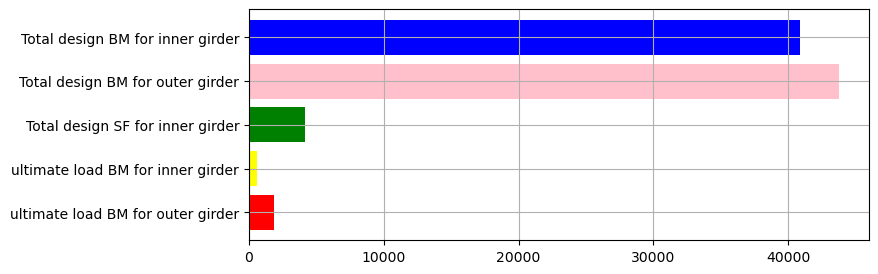

In [70]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 3))
x=([M_outer_uls,M_inner_uls,V_inner_design,M_outer_design,M_inner_design])
c = ['red', 'yellow','green','pink','blue']
y=(["ultimate load BM for outer girder","ultimate load BM for inner girder","Total design SF for inner girder","Total design BM for outer girder","Total design BM for inner girder"])
plt.barh(y,x,height=0.8,color=c)
plt.grid()

In [44]:
# This program calculates the reaction factors, ultimate load bending moment, total design shear force, and required area of steel for the outer and inner girders in a multi-girder bridge using Courbon's method

# Get input from the user
def cal2(DLL,MLL,sp,no_girders):
    global outer_girder_reaction_factor,ultimate_load_bm,ultimate_load_bm,outer_girder_total_design_sf,inner_girder_total_design_sf
    dead_load = 25
    live_load = 20
    span_length =20
    number_of_girders = no_girders
    design_load_factor =1.35  # partial safety factor for loads
    self_weight_factor = 1.1  # partial safety factor for materials
    steel_grade = sg

    # Steel properties
    yield_strength = steel_grade / 1.15  # Yield strength (in MPa)
    modulus_of_elasticity = 200000  # Modulus of elasticity (in MPa)

    # Calculate the total load on the bridge
    total_load = (dead_load + live_load * design_load_factor) * self_weight_factor

    # Calculate the total shear force and bending moment on the bridge
    total_shear_force = total_load / 2
    total_bending_moment = total_load * span_length ** 2 / 8

    # Calculate the reaction factors for the outer and inner girders
    outer_girder_reaction_factor = total_shear_force + (total_bending_moment / (span_length / (number_of_girders - 1)))
    inner_girder_reaction_factor = total_shear_force - outer_girder_reaction_factor

    # Calculate the ultimate load bending moment and total design shear force for the outer and inner girders
    ultimate_load_bm = total_load * span_length ** 2 / (number_of_girders - 1) ** 2 / 8
    outer_girder_total_design_sf = (dead_load / 2) + (live_load * design_load_factor / 2)
    inner_girder_total_design_sf = outer_girder_total_design_sf

    # Display the result
    print("Reaction factor for outer girder:", outer_girder_reaction_factor, "kN")
    print("Ultimate load bending moment for outer girder:", ultimate_load_bm, "kN-m")
    print("Ultimate load bending moment for inner girder:", ultimate_load_bm, "kN-m")
    print("Total design shear force for outer girder:", outer_girder_total_design_sf, "kN")
    print("Total design shear force for inner girder:", inner_girder_total_design_sf, "kN")
cal2(DLL,MLL,sp,no_girders)

Reaction factor for outer girder: 314.6 kN
Ultimate load bending moment for outer girder: 715.0 kN-m
Ultimate load bending moment for inner girder: 715.0 kN-m
Total design shear force for outer girder: 26.0 kN
Total design shear force for inner girder: 26.0 kN


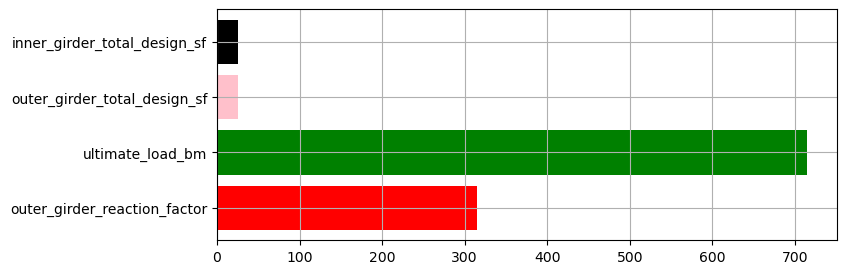

In [62]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 3))
x=([outer_girder_reaction_factor,ultimate_load_bm,ultimate_load_bm,outer_girder_total_design_sf,inner_girder_total_design_sf])
c = ['red', 'yellow','green','pink','black']
y=(["outer_girder_reaction_factor","ultimate_load_bm","ultimate_load_bm","outer_girder_total_design_sf","inner_girder_total_design_sf"])
plt.barh(y,x,height=0.8,color=c)
plt.grid()

In [85]:
# Define the design parameters
def ast_cal(L,cg,sg):
    global As_outer,As_inner
    L = L  # Span length of the bridge in meters
    w = 1.2 # Total width of the bridge in meters
    D = 1.5  # Depth of the girders in meters
    fc = cg  # Concrete compressive strength in MPa
    fy = sg  # Steel yield strength in MPa

    # Calculate the maximum bending moment and shear force for the outer and inner girders
    Mmax_outer = (w * L**2) / 8  # Maximum bending moment for the outer girder
    Mmax_inner = (w * L**2) / 16  # Maximum bending moment for the inner girder
    Vmax = w * L / 2  # Maximum shear force for both girders

    # Determine the properties of the steel
    f_allowable = 0.4 * fy  # Allowable stress of the steel

    # Calculate the required area of steel for the outer and inner girders
    As_outer = (Mmax_outer / (0.95 * f_allowable * D)) * 10**6  # Required area of steel for the outer girder in mm^2
    As_inner = (Mmax_inner / (0.95 * f_allowable * D)) * 10**6  # Required area of steel for the inner girder in mm^2

    # Print the results
    print(f"The required area of steel for the outer girder is {As_outer:.2f} mm^2")
    print(f"The required area of steel for the inner girder is {As_inner:.2f} mm^2")
ast_cal(L,cg,sg)

The required area of steel for the outer girder is 253646.16 mm^2
The required area of steel for the inner girder is 126823.08 mm^2


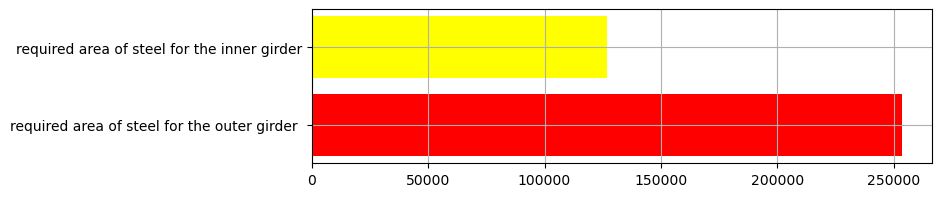

In [86]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 2))
x=([As_outer,As_inner])
c = ['red', 'yellow']
y=(["required area of steel for the outer girder ","required area of steel for the inner girder"])
plt.barh(y,x,height=0.8,color=c)
plt.grid()